##Group Members
Sarthak Achyut Vaidya (20016184)

Sai Venkata Subbaraya Akhil (20012406)

Piyush Devendra Kataktalware (20022156)

##Attribute Information

1) Date: The date of observation.

2) Location: The common name of the location of the weather station.

3) MinTemp: The minimum temperature in degrees celsius.

4) MaxTemp: The maximum temperature in degrees celsius.

5) Rainfall: The amount of rainfall recorded for the day in mm.

6) Evaporation: The so-called Class A pan evaporation (mm) in the 24 hours to 9am.

7) Sunshine: The number of hours of bright sunshine in the day.

8) WindGustDir: The direction of the strongest wind gust in the 24 hours to midnight.

9) WindGustSpeed: The speed (km/h) of the strongest wind gust in the 24 hours to midnight.

10) WindDir9am: Direction of the wind at 9am.

11) WindDir3pm: Direction of the wind at 3pm.

12) WindSpeed9am: Wind speed (km/hr) averaged over 10 minutes prior to 9am.

13) WindSpeed3pm: Wind speed (km/hr) averaged over 10 minutes prior to 3pm

14) Humidity9am: Humidity (percent) at 9am

15) Humidity3pm: Humidity (percent) at 3pm

16) Pressure9am: Atmospheric pressure (hpa) reduced to mean sea level at 9am

17) Pressure3pm: Atmospheric pressure (hpa) reduced to mean sea level at 3pm

18) Cloud9am: Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear sky whilst an 8 indicates that it is completely overcast.

19) Cloud3pm: Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values

20) Temp9am: Temperature (degrees C) at 9am

21) Temp3pm: Temperature (degrees C) at 3pm

22) RainToday Boolean: Yes if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise No

23) RainTomorrow: The amount of next day rain in mm. Used to create response variable RainTomorrow. A kind of measure of the "risk".

##Rain Prediction with 6 Algorithms

(1)Logistic Regression

(2)KNN

(3)Naive Bayes

(4)Random Forest

(5)Decision Tree

(6)Using xgboostClassifier of tree class to use Decision Tree Algorithm

##Importing the necessary libraries

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")

In [49]:
df = pd.read_csv("weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [51]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [52]:
df.isna()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
2,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
4,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
145456,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
145457,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
145458,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [53]:
df.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [54]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

# Dropping all null rows

In [55]:
df = df.dropna()

In [56]:
df.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56420 entries, 6049 to 142302
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           56420 non-null  object 
 1   Location       56420 non-null  object 
 2   MinTemp        56420 non-null  float64
 3   MaxTemp        56420 non-null  float64
 4   Rainfall       56420 non-null  float64
 5   Evaporation    56420 non-null  float64
 6   Sunshine       56420 non-null  float64
 7   WindGustDir    56420 non-null  object 
 8   WindGustSpeed  56420 non-null  float64
 9   WindDir9am     56420 non-null  object 
 10  WindDir3pm     56420 non-null  object 
 11  WindSpeed9am   56420 non-null  float64
 12  WindSpeed3pm   56420 non-null  float64
 13  Humidity9am    56420 non-null  float64
 14  Humidity3pm    56420 non-null  float64
 15  Pressure9am    56420 non-null  float64
 16  Pressure3pm    56420 non-null  float64
 17  Cloud9am       56420 non-null  float64
 18  Cl

In [58]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No


Dropping the date column

In [59]:
df.drop(columns = ['Date'], inplace = True)

In [60]:
#Convert RainToday and RainTomorrow into 0's and 1's
df['RainToday'] = df['RainToday'].apply(lambda x : 1 if x == "Yes" else 0)
df['RainTomorrow'] = df['RainTomorrow'].apply(lambda x : 1 if x == "Yes" else 0)

This code is converting the values in two columns of a dataframe ('RainToday', 'RainTomorrow') into binary form, where 1 indicates a certain value and 0 indicates another.

Specifically, it is converting the values in the 'RainToday' column where 'No' is converted to 0 and 'Yes' to 1. The 'RainTomorrow' column values where 'Yes' is converted to 1 and 'No' to 0.

This conversion is often done to prepare categorical variables for machine learning algorithms that can only handle numerical data.

In [61]:
#One hot encoding
data_dummies = df[['Location','WindGustDir', 'WindDir9am', 'WindDir3pm']]
data_dummies=pd.get_dummies(data_dummies)
df.drop(columns=['Location','WindGustDir', 'WindDir9am', 'WindDir3pm'],inplace=True)

This code performs one-hot encoding on the 'Location', 'WindGustDir', 'WindDir9am' and 'WindDir3pm' columns in the 'df' DataFrame. It creates new columns for each unique value in the original columns, and sets the value to 1 if that value is present in the row and 0 otherwise. The new columns are added to a new DataFrame called 'data_dummies'.

Finally, the original columns ('Location', 'WindGustDir', 'WindDir9am' and 'WindDir3pm') are dropped from the original DataFrame ('df') using the 'drop' method with the 'columns' parameter set to a list of the column names to be dropped. The 'inplace' parameter is set to 'True' to modify the 'df' DataFrame in place.

In [62]:
data_dummies

,Location_AliceSprings,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Darwin,Location_Hobart,Location_Melbourne,Location_MelbourneAirport,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
6049,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6050,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6052,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6053,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6054,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
142299,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
142300,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
142301,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [63]:
data_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56420 entries, 6049 to 142302
Data columns (total 74 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Location_AliceSprings      56420 non-null  uint8
 1   Location_Brisbane          56420 non-null  uint8
 2   Location_Cairns            56420 non-null  uint8
 3   Location_Canberra          56420 non-null  uint8
 4   Location_Cobar             56420 non-null  uint8
 5   Location_CoffsHarbour      56420 non-null  uint8
 6   Location_Darwin            56420 non-null  uint8
 7   Location_Hobart            56420 non-null  uint8
 8   Location_Melbourne         56420 non-null  uint8
 9   Location_MelbourneAirport  56420 non-null  uint8
 10  Location_Mildura           56420 non-null  uint8
 11  Location_Moree             56420 non-null  uint8
 12  Location_MountGambier      56420 non-null  uint8
 13  Location_NorfolkIsland     56420 non-null  uint8
 14  Location_Nuriootpa

In [64]:
df

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0
6050,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0
6052,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0
6053,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0
6054,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,19.3,33.4,0.0,6.0,11.0,35.0,9.0,20.0,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,0,0
142299,21.2,32.6,0.0,7.6,8.6,37.0,13.0,11.0,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,0,0
142300,20.7,32.8,0.0,5.6,11.0,33.0,17.0,11.0,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,0,0
142301,19.5,31.8,0.0,6.2,10.6,26.0,9.0,17.0,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,0,0


In [65]:
y=df['RainTomorrow']
df.drop(columns=['RainTomorrow'], inplace= True)
x = df.merge(data_dummies, left_index=True, right_index=True, how='left')

The code is separating the target variable RainTomorrow from the features in the DataFrame df. It then removes the RainTomorrow column from the df DataFrame and saves it as the target variable y.

Finally, the code merges the one-hot encoded data_dummies DataFrame with the original df DataFrame on their indexes, dropping any rows that are not present in both DataFrames. The resulting DataFrame x contains all the original features with the one-hot encoded columns added to it.

In [66]:
x

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
6049,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,...,0,0,0,0,0,0,1,0,0,0
6050,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,...,0,0,0,0,1,0,0,0,0,0
6052,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,...,1,0,0,0,0,0,0,0,0,0
6053,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,...,0,0,0,0,0,0,0,0,0,1
6054,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,19.3,33.4,0.0,6.0,11.0,35.0,9.0,20.0,63.0,32.0,...,0,0,0,0,0,0,0,0,0,0
142299,21.2,32.6,0.0,7.6,8.6,37.0,13.0,11.0,56.0,28.0,...,0,0,0,1,0,0,0,0,0,0
142300,20.7,32.8,0.0,5.6,11.0,33.0,17.0,11.0,46.0,23.0,...,0,0,0,0,0,0,0,1,0,0
142301,19.5,31.8,0.0,6.2,10.6,26.0,9.0,17.0,62.0,58.0,...,1,0,0,0,0,0,0,0,0,0


In [67]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56420 entries, 6049 to 142302
Data columns (total 91 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   MinTemp                    56420 non-null  float64
 1   MaxTemp                    56420 non-null  float64
 2   Rainfall                   56420 non-null  float64
 3   Evaporation                56420 non-null  float64
 4   Sunshine                   56420 non-null  float64
 5   WindGustSpeed              56420 non-null  float64
 6   WindSpeed9am               56420 non-null  float64
 7   WindSpeed3pm               56420 non-null  float64
 8   Humidity9am                56420 non-null  float64
 9   Humidity3pm                56420 non-null  float64
 10  Pressure9am                56420 non-null  float64
 11  Pressure3pm                56420 non-null  float64
 12  Cloud9am                   56420 non-null  float64
 13  Cloud3pm                   56420 non-null 

In [68]:
y.info()

<class 'pandas.core.series.Series'>
Int64Index: 56420 entries, 6049 to 142302
Series name: RainTomorrow
Non-Null Count  Dtype
--------------  -----
56420 non-null  int64
dtypes: int64(1)
memory usage: 2.9 MB


In [69]:
value_counts = y.value_counts()
value_counts

0    43993
1    12427
Name: RainTomorrow, dtype: int64

##Since the data is imabalanced

imbalanced-learn is a Python package used for handling imbalanced datasets, which are datasets with unequal distribution of classes. It provides various techniques for resampling the data to balance the classes, which can help improve the performance of machine learning models trained on such datasets. By installing/upgrading the imbalanced-learn package, the user can access its functions and classes for building more effective models on imbalanced datasets.

In [70]:
!pip install -U imbalanced-learn

In [71]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(random_state = 0)
x, y = oversample.fit_resample(x, y)

This code is performing oversampling using RandomOverSampler from the imbalanced-learn library. The purpose of oversampling is to balance the class distribution in the target variable 'y' by creating more samples of the minority class (i.e., the class with fewer observations) to match the majority class.

The RandomOverSampler randomly selects samples from the minority class and creates new samples until both classes have an equal number of observations. The resulting oversampled dataset has more observations and a balanced distribution of the target variable, which can improve the performance of machine learning models, particularly when the original dataset is imbalanced.

In the code, 'x' is the feature matrix and 'y' is the target variable. The oversample.fit_resample() method applies the oversampling technique to 'x' and 'y' and returns the oversampled feature matrix 'x' and target variable 'y'.

In [72]:
value_counts = y.value_counts()
value_counts

0    43993
1    43993
Name: RainTomorrow, dtype: int64

# Plotting histograms for numerical features

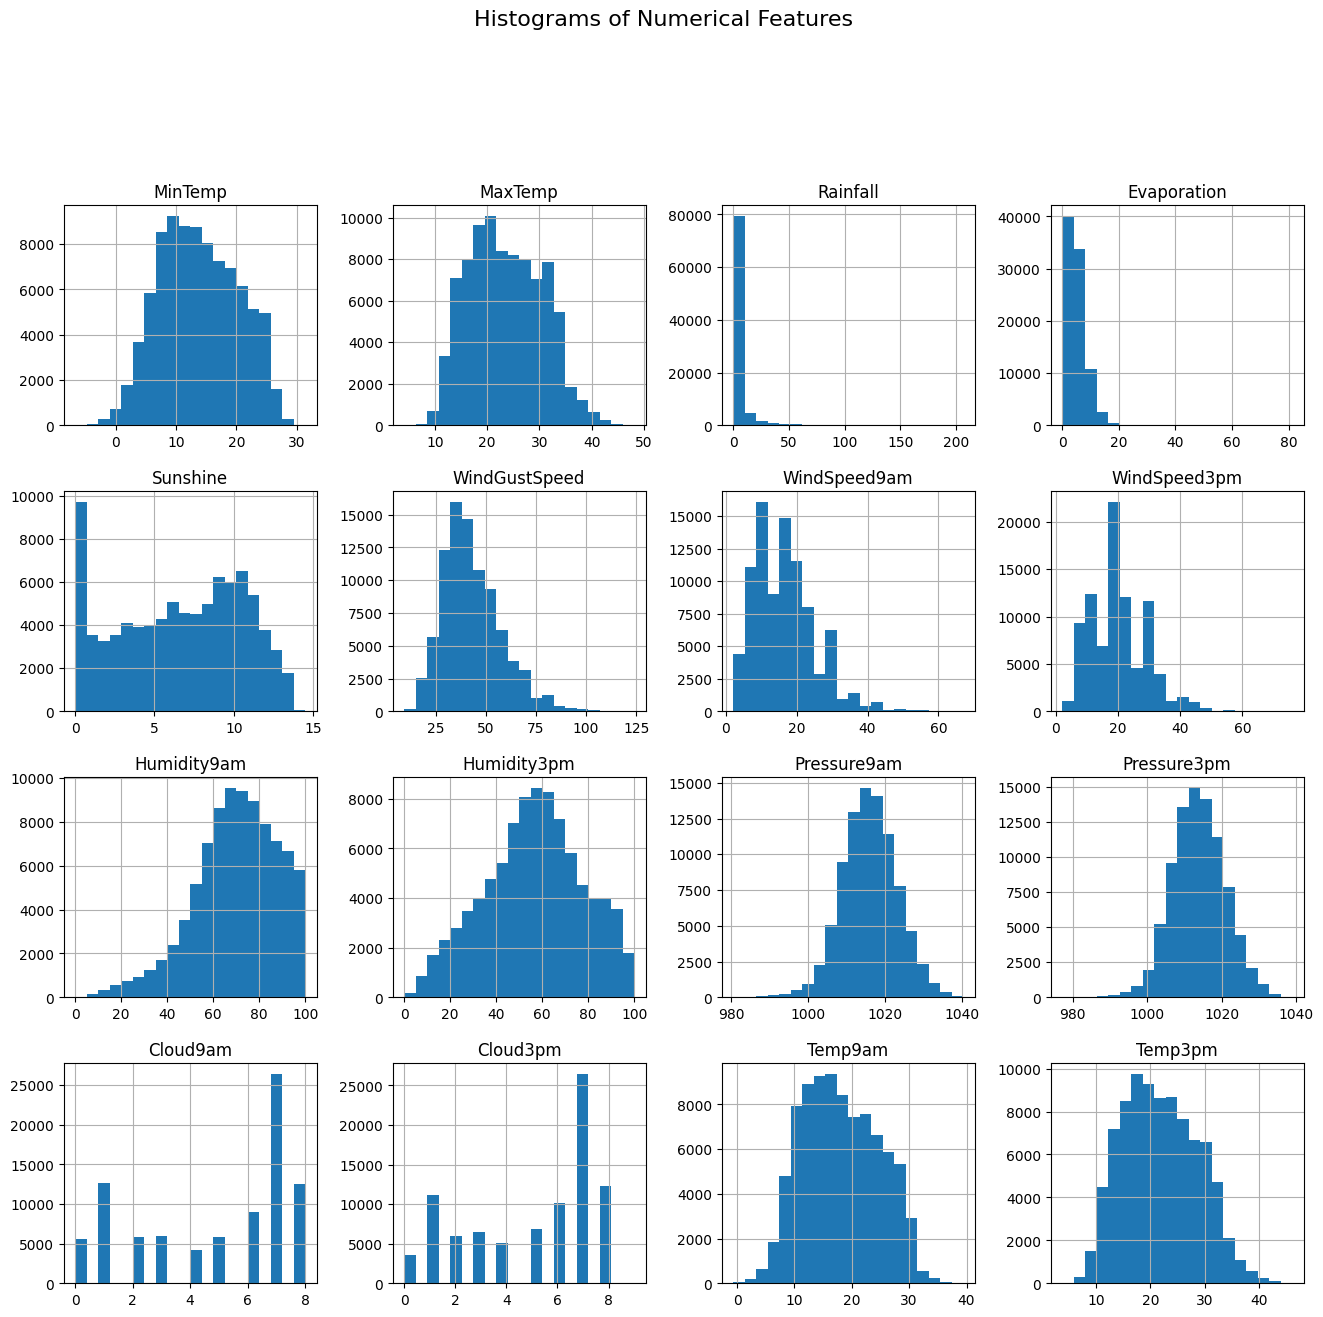

In [73]:
numerical_features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                       'Temp9am', 'Temp3pm']


x[numerical_features].hist(bins=20, figsize=(16, 14))
plt.suptitle('Histograms of Numerical Features', y=1.02, size=16)
plt.show()

##Plotting count plot for categorical features

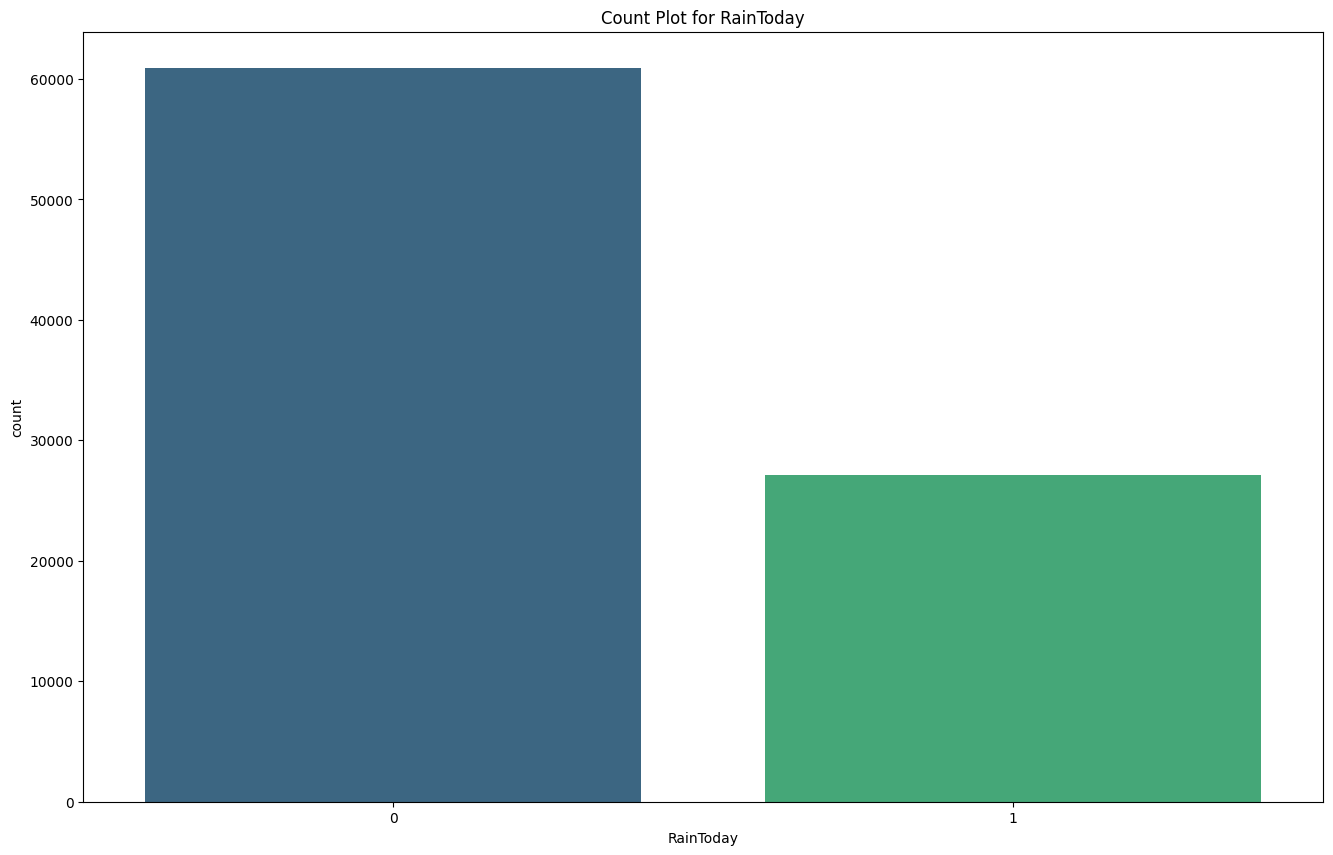

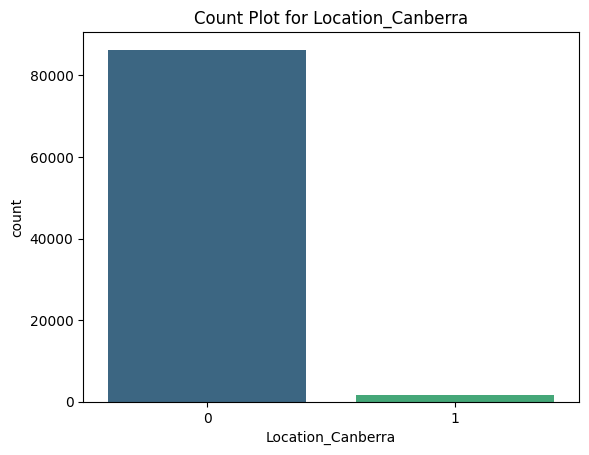

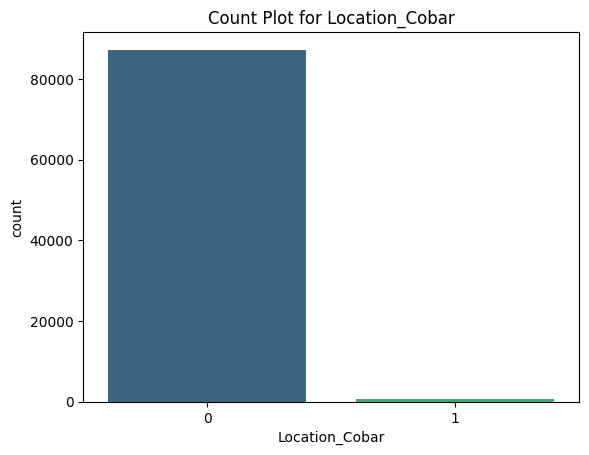

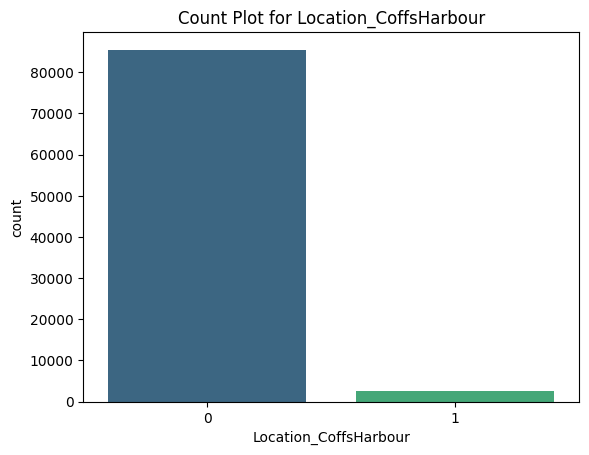

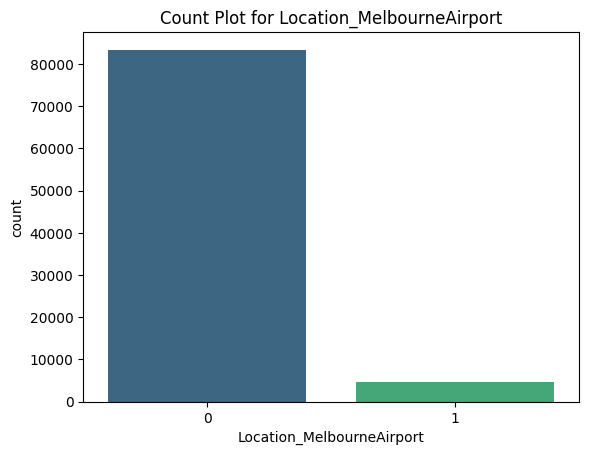

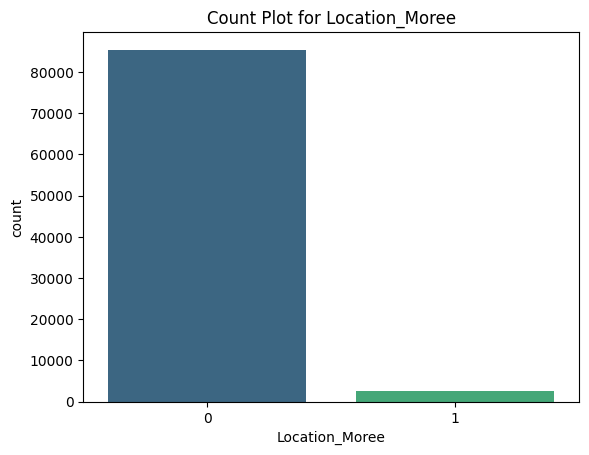

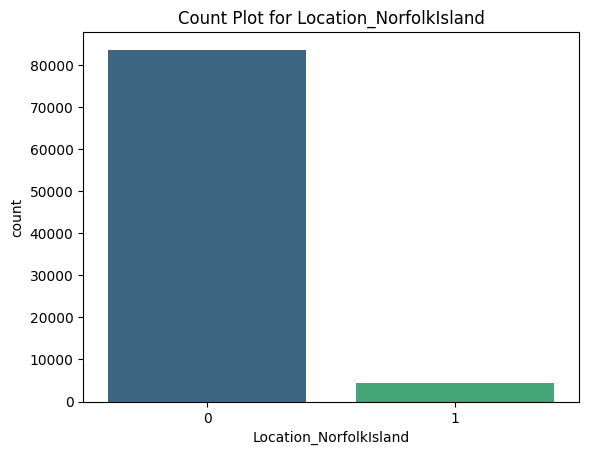

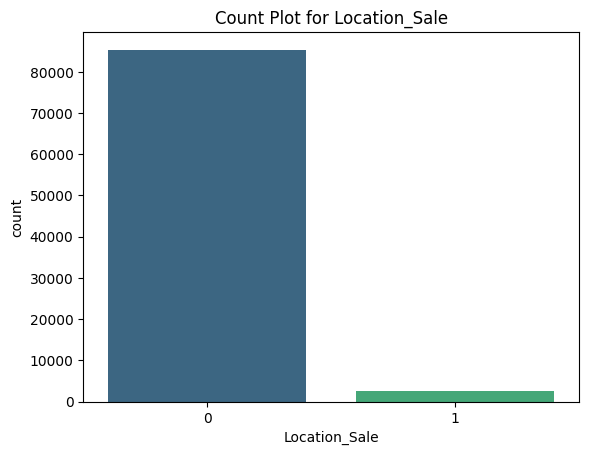

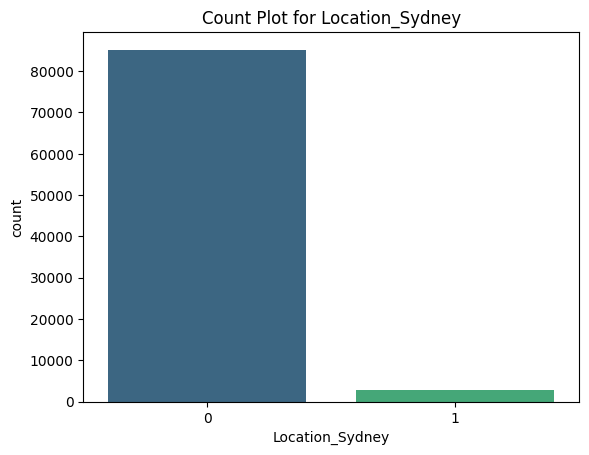

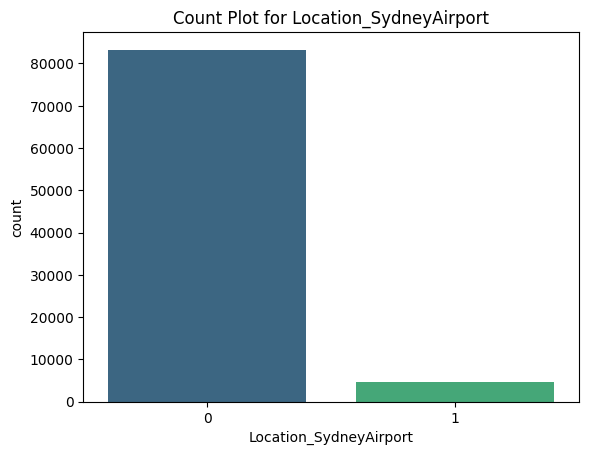

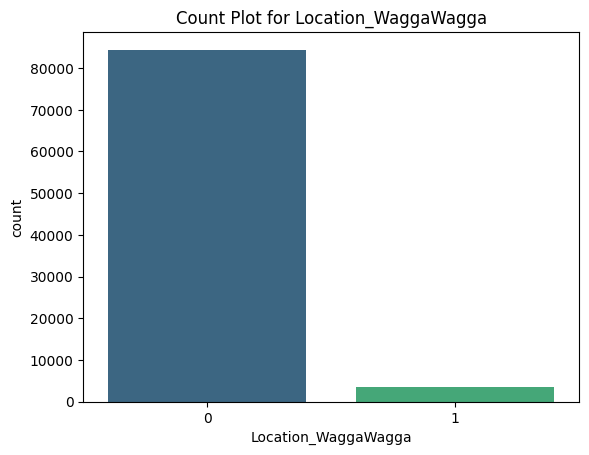

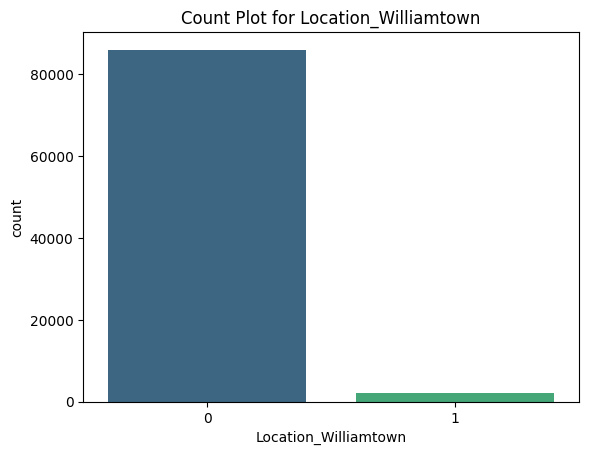

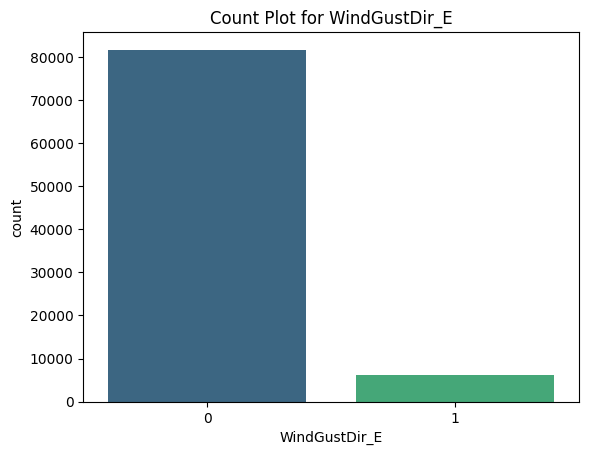

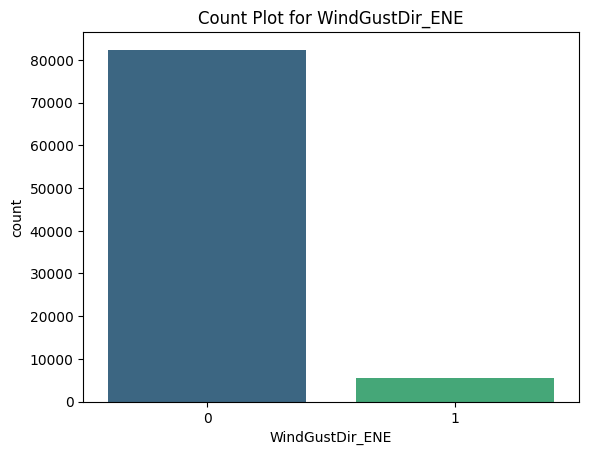

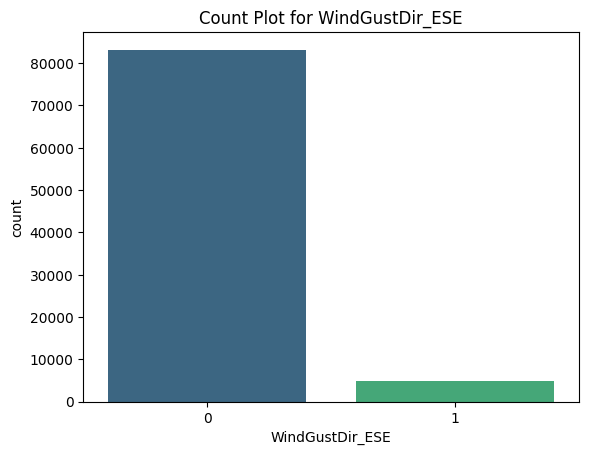

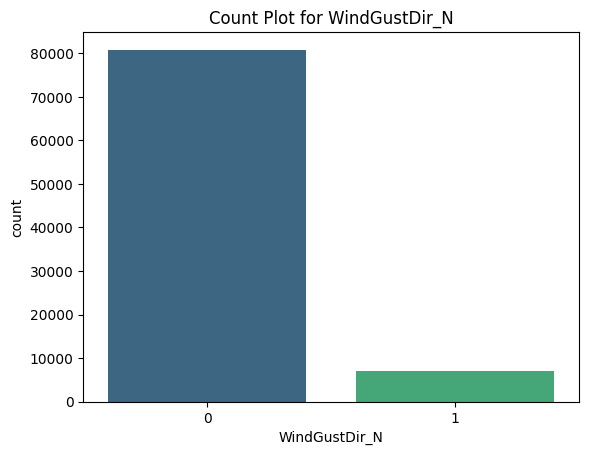

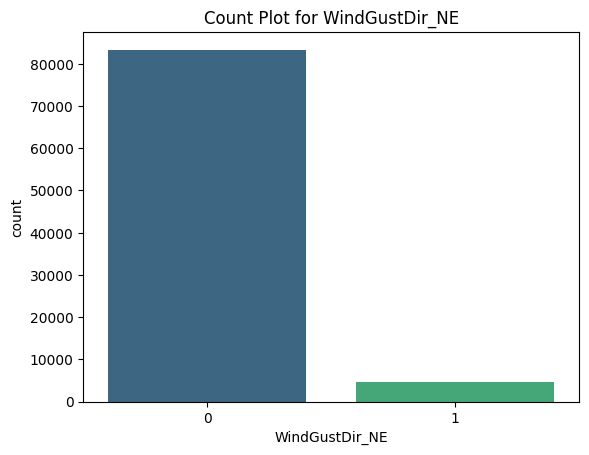

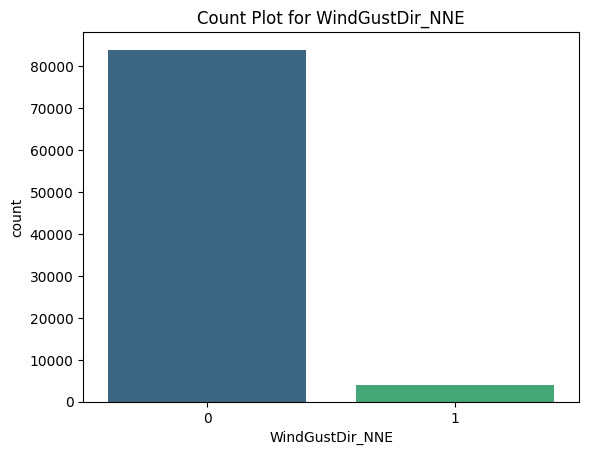

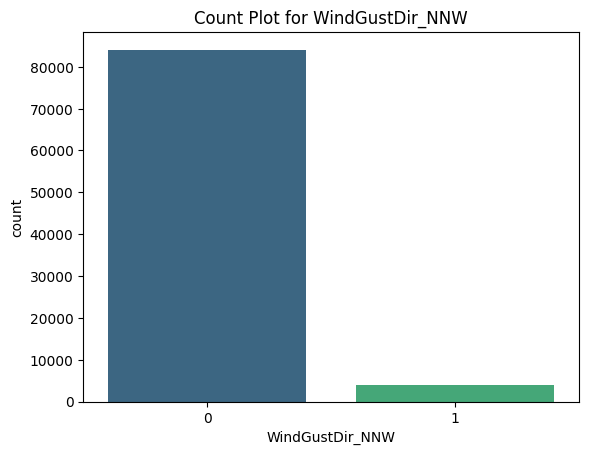

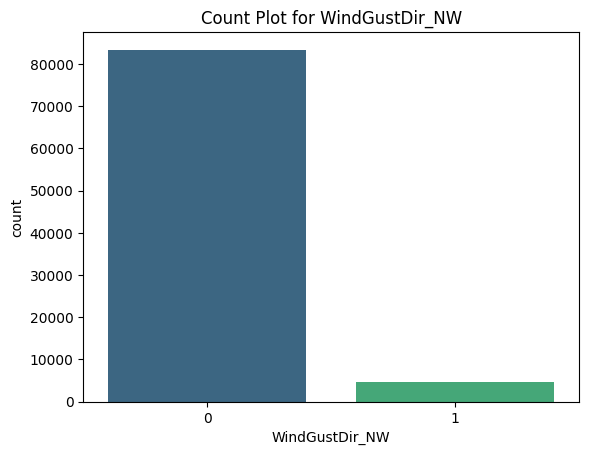

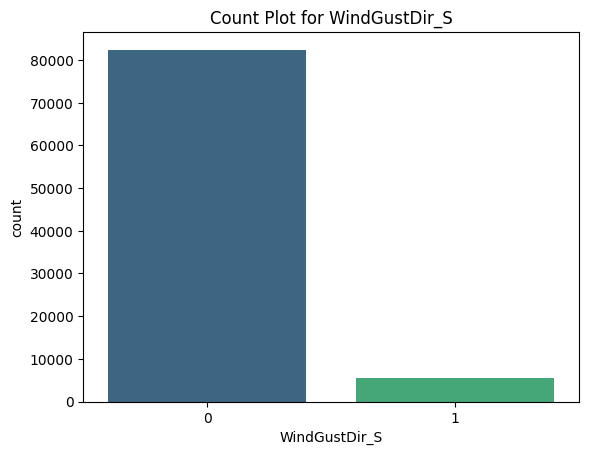

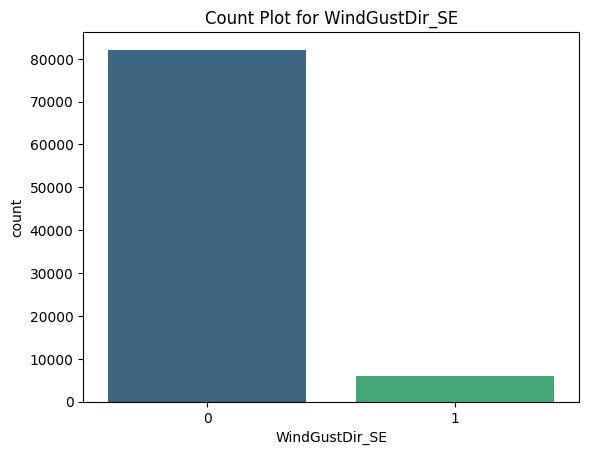

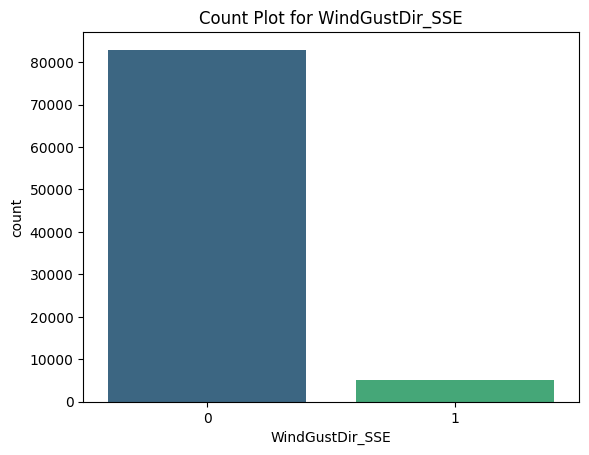

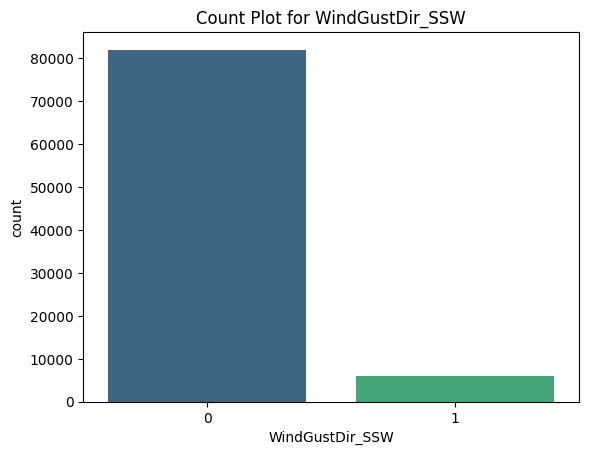

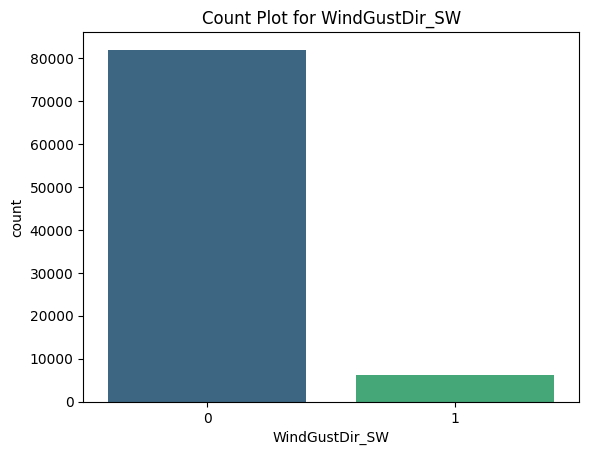

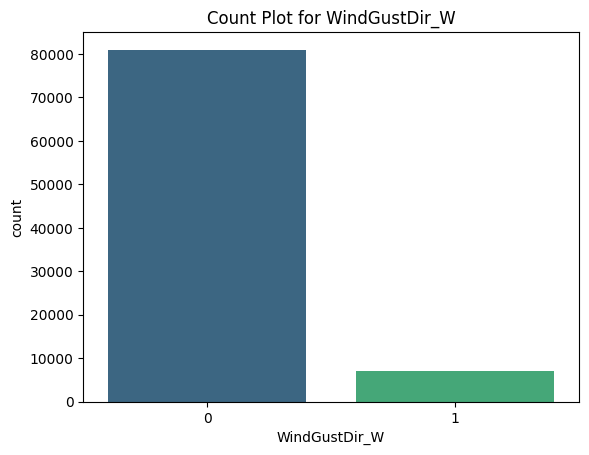

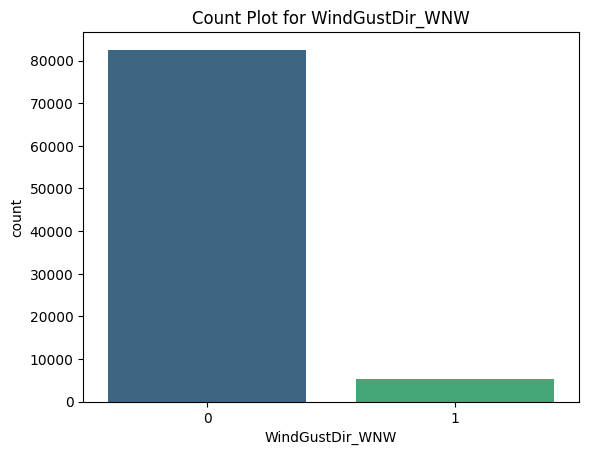

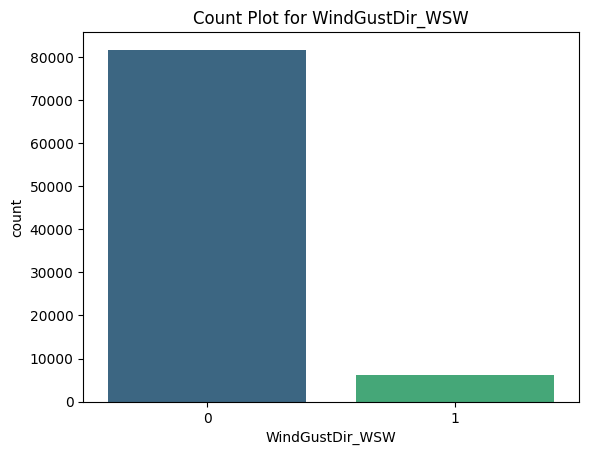

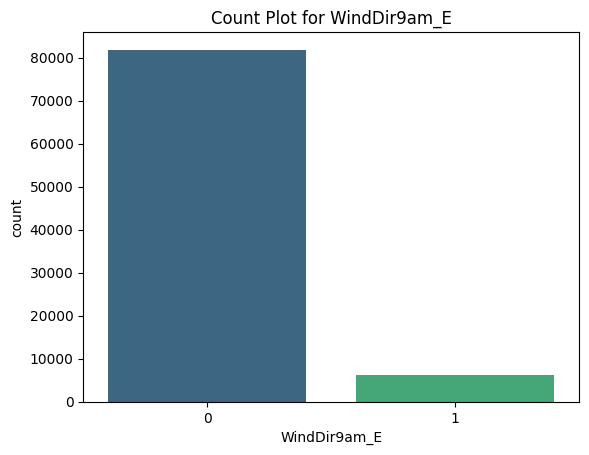

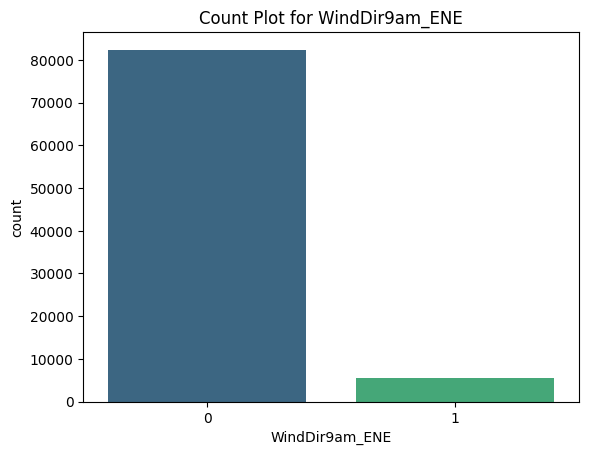

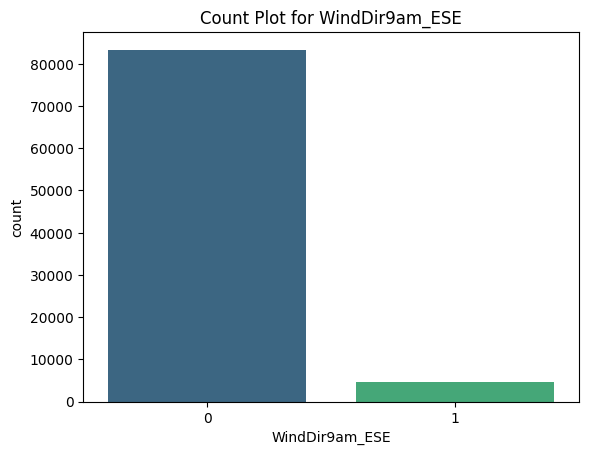

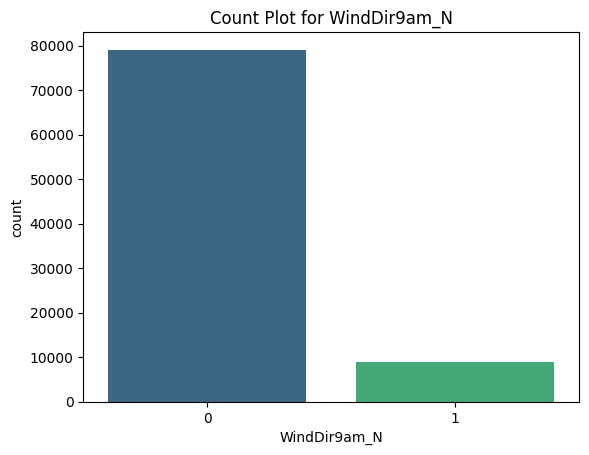

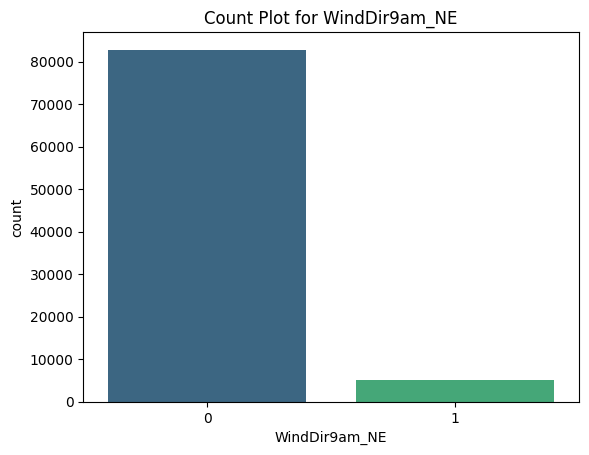

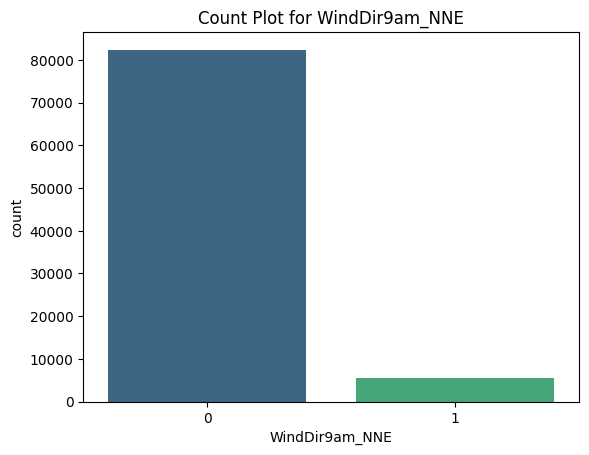

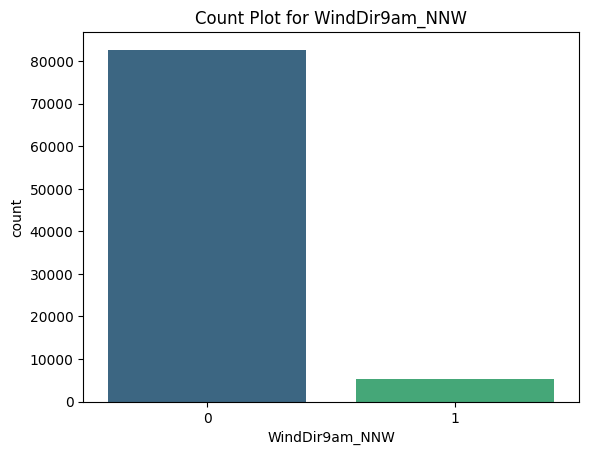

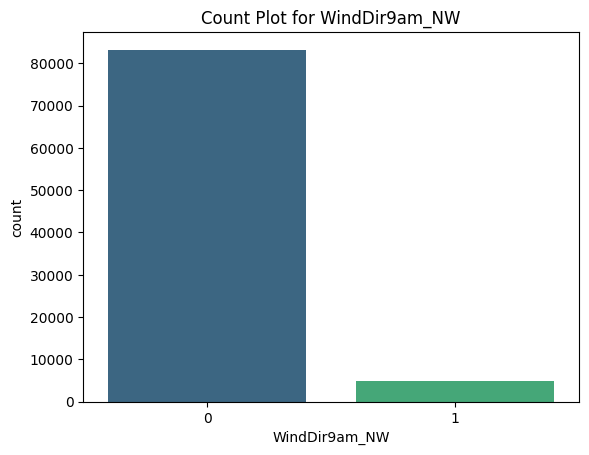

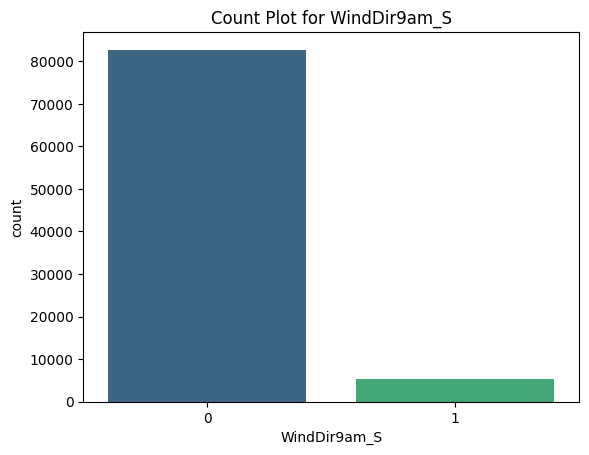

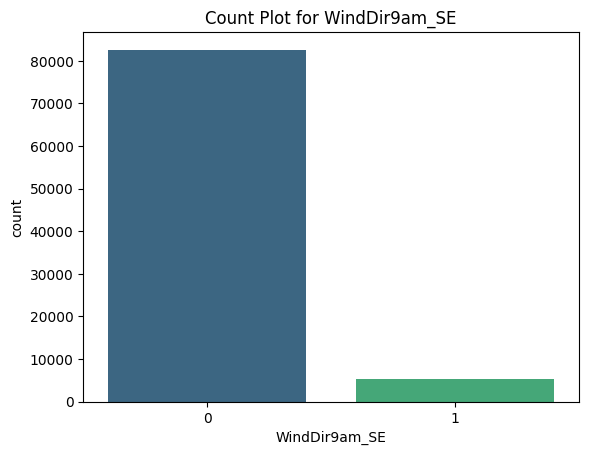

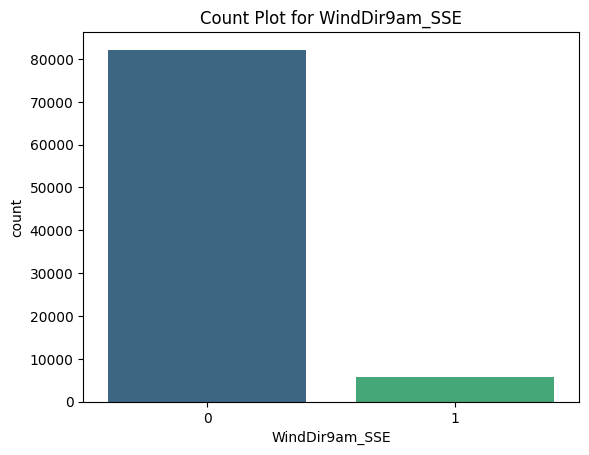

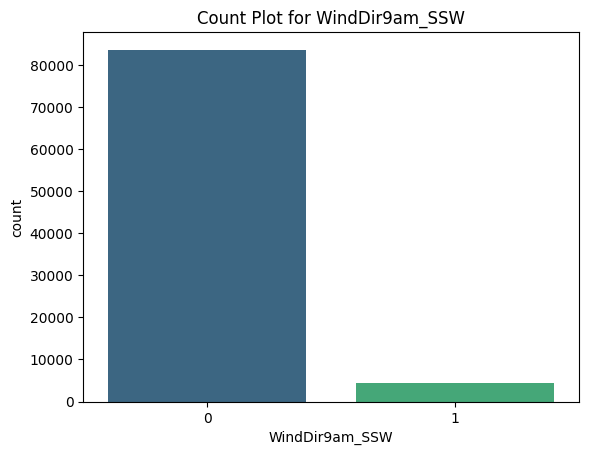

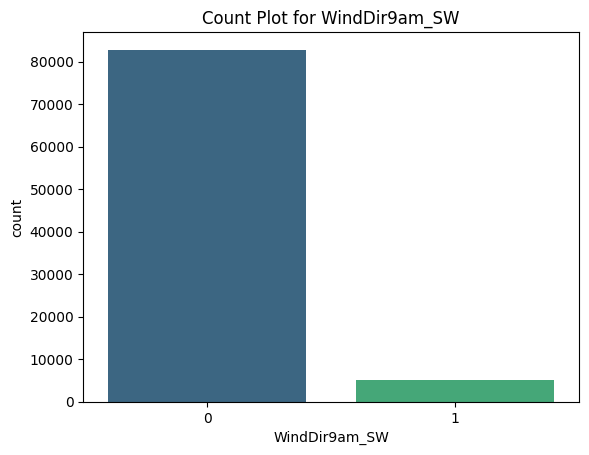

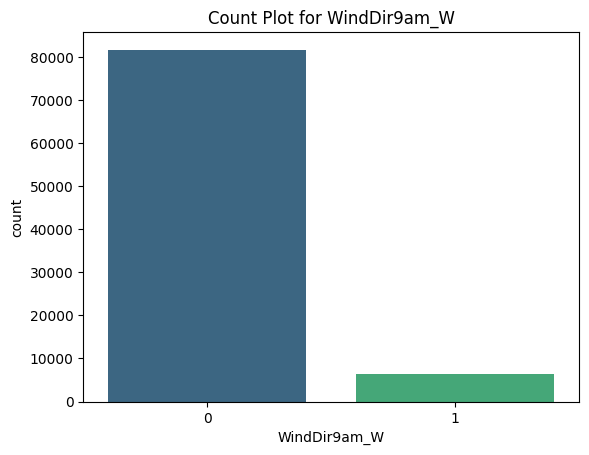

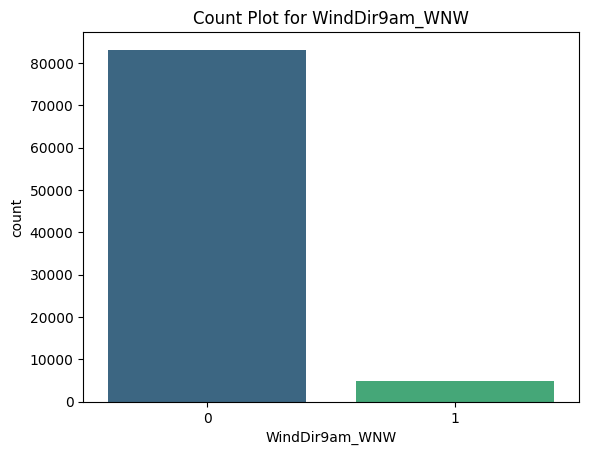

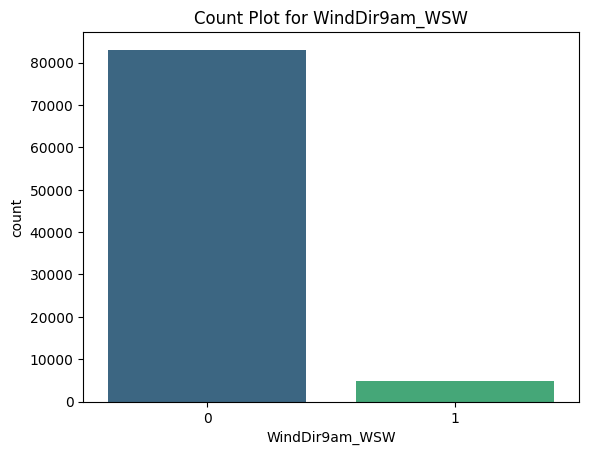

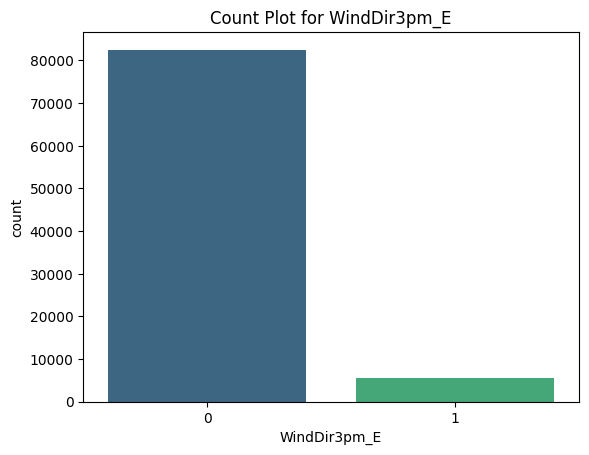

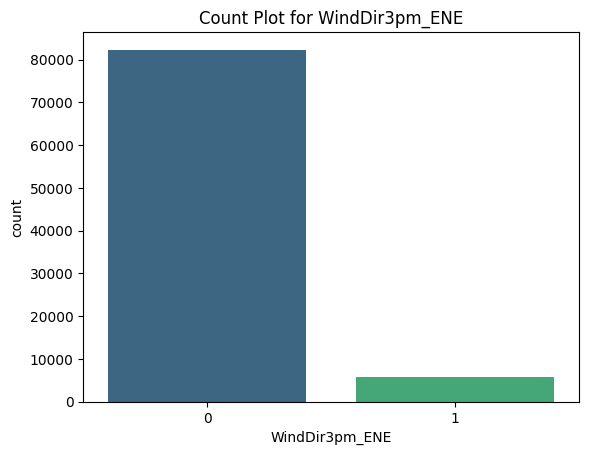

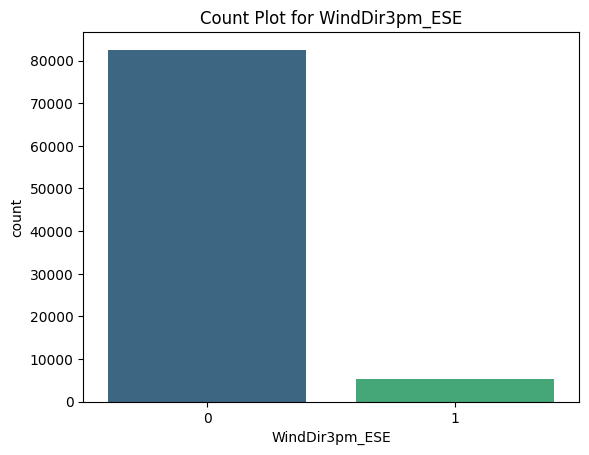

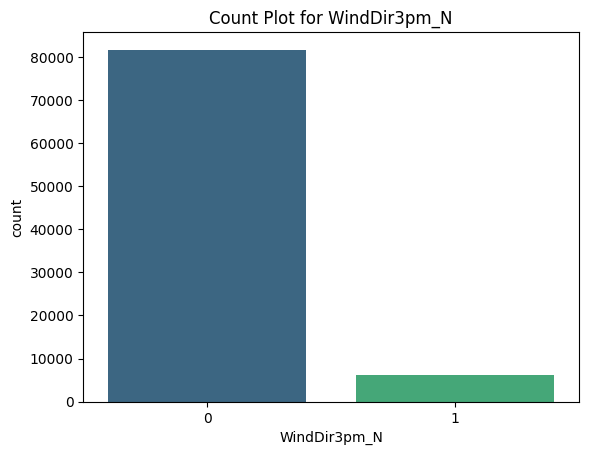

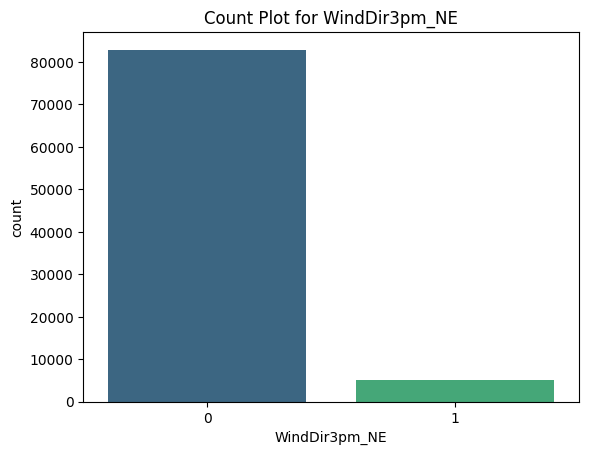

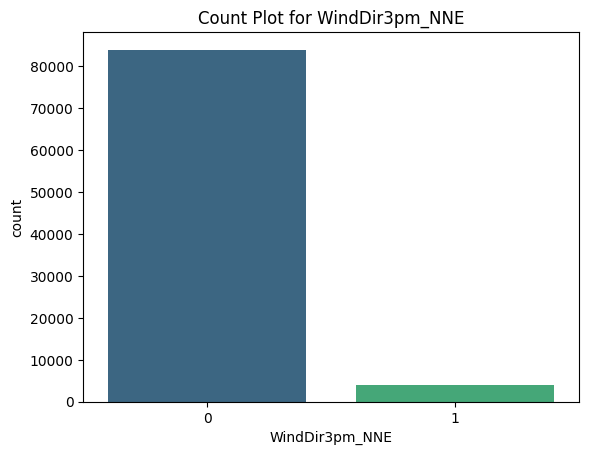

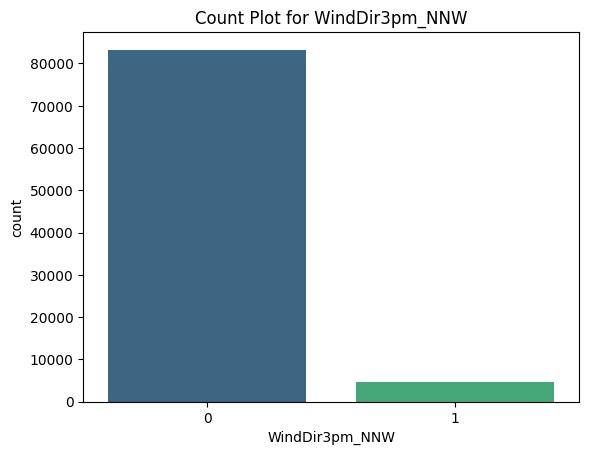

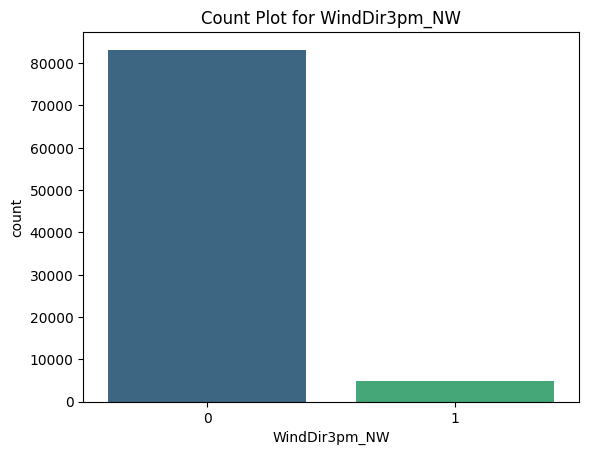

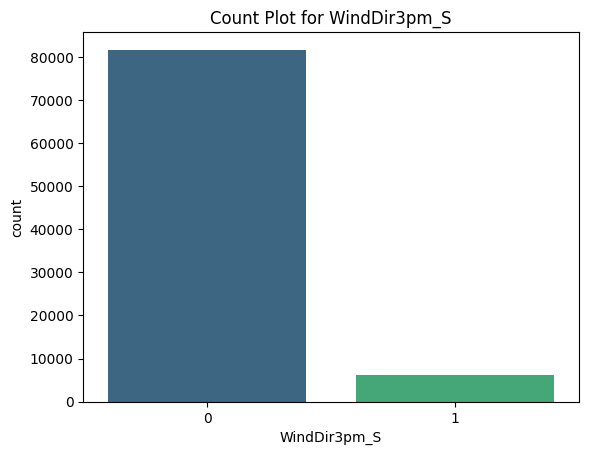

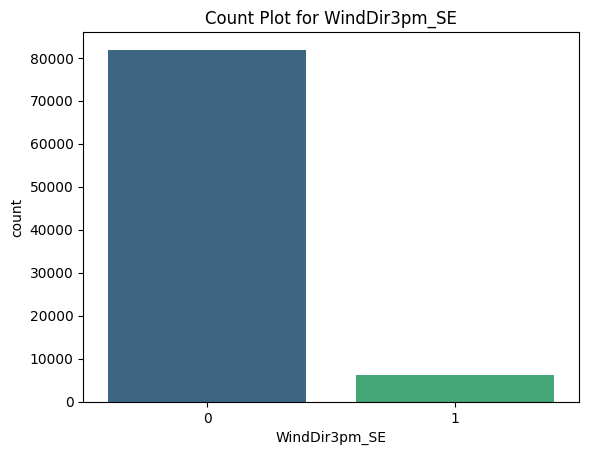

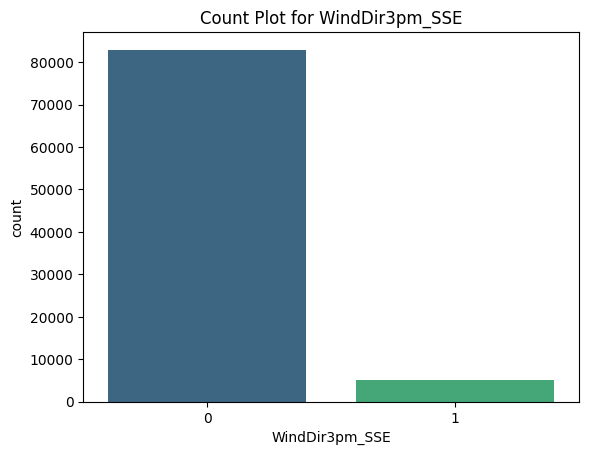

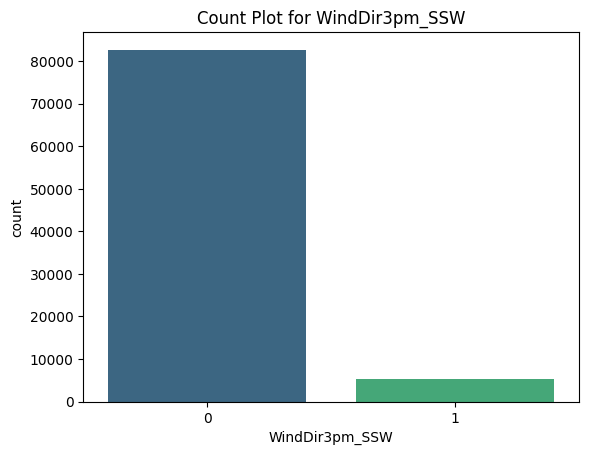

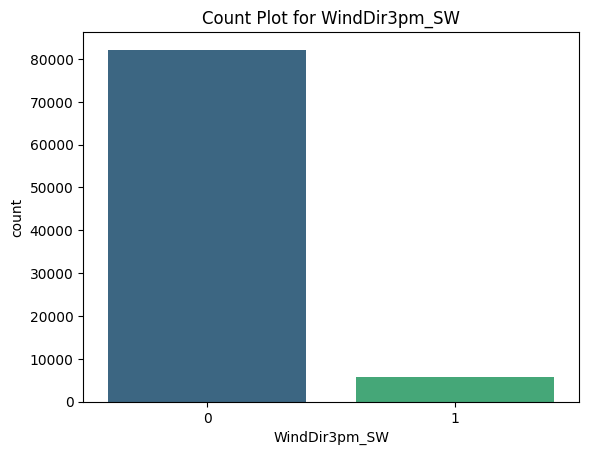

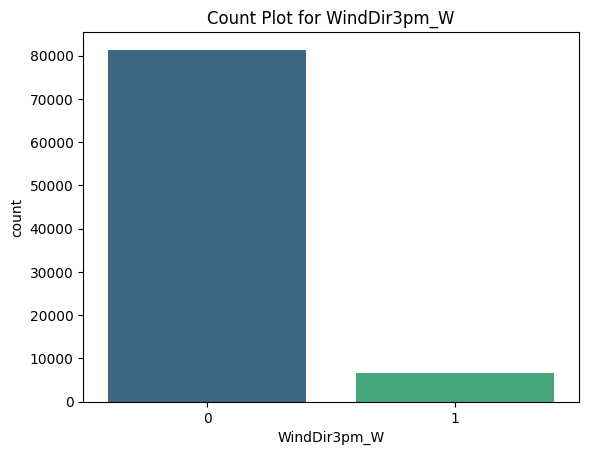

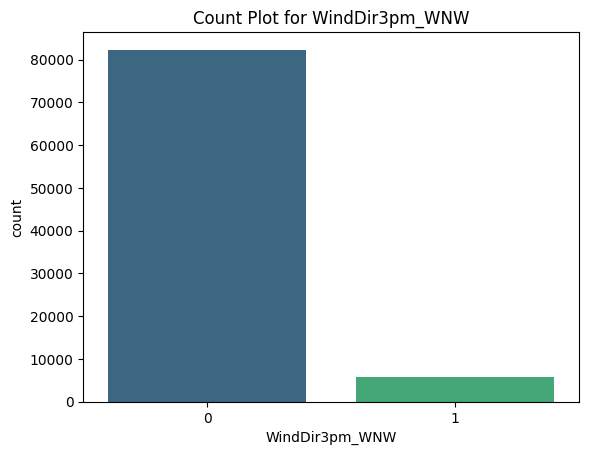

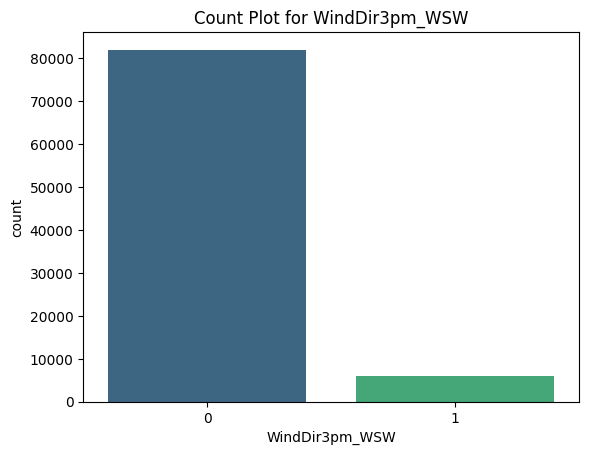

In [74]:

categorical_features = ['RainToday', 'Location_Canberra', 'Location_Cobar',
                         'Location_CoffsHarbour', 'Location_MelbourneAirport',
                         'Location_Moree', 'Location_NorfolkIsland', 'Location_Sale',
                         'Location_Sydney', 'Location_SydneyAirport', 'Location_WaggaWagga',
                         'Location_Williamtown', 'WindGustDir_E', 'WindGustDir_ENE',
                         'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE',
                         'WindGustDir_NNE', 'WindGustDir_NNW', 'WindGustDir_NW',
                         'WindGustDir_S', 'WindGustDir_SE', 'WindGustDir_SSE',
                         'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W',
                         'WindGustDir_WNW', 'WindGustDir_WSW', 'WindDir9am_E',
                         'WindDir9am_ENE', 'WindDir9am_ESE', 'WindDir9am_N',
                         'WindDir9am_NE', 'WindDir9am_NNE', 'WindDir9am_NNW',
                         'WindDir9am_NW', 'WindDir9am_S', 'WindDir9am_SE',
                         'WindDir9am_SSE', 'WindDir9am_SSW', 'WindDir9am_SW',
                         'WindDir9am_W', 'WindDir9am_WNW', 'WindDir9am_WSW',
                         'WindDir3pm_E', 'WindDir3pm_ENE', 'WindDir3pm_ESE',
                         'WindDir3pm_N', 'WindDir3pm_NE', 'WindDir3pm_NNE',
                         'WindDir3pm_NNW', 'WindDir3pm_NW', 'WindDir3pm_S',
                         'WindDir3pm_SE', 'WindDir3pm_SSE', 'WindDir3pm_SSW',
                         'WindDir3pm_SW', 'WindDir3pm_W', 'WindDir3pm_WNW',
                         'WindDir3pm_WSW']

# Plotting count plot for categorical features
plt.figure(figsize=(16, 10))
for feature in categorical_features:
    sns.countplot(x=feature, data=x, palette='viridis')
    plt.title(f'Count Plot for {feature}')
    plt.show()

## Plotting scatter plots for relationships between numerical features

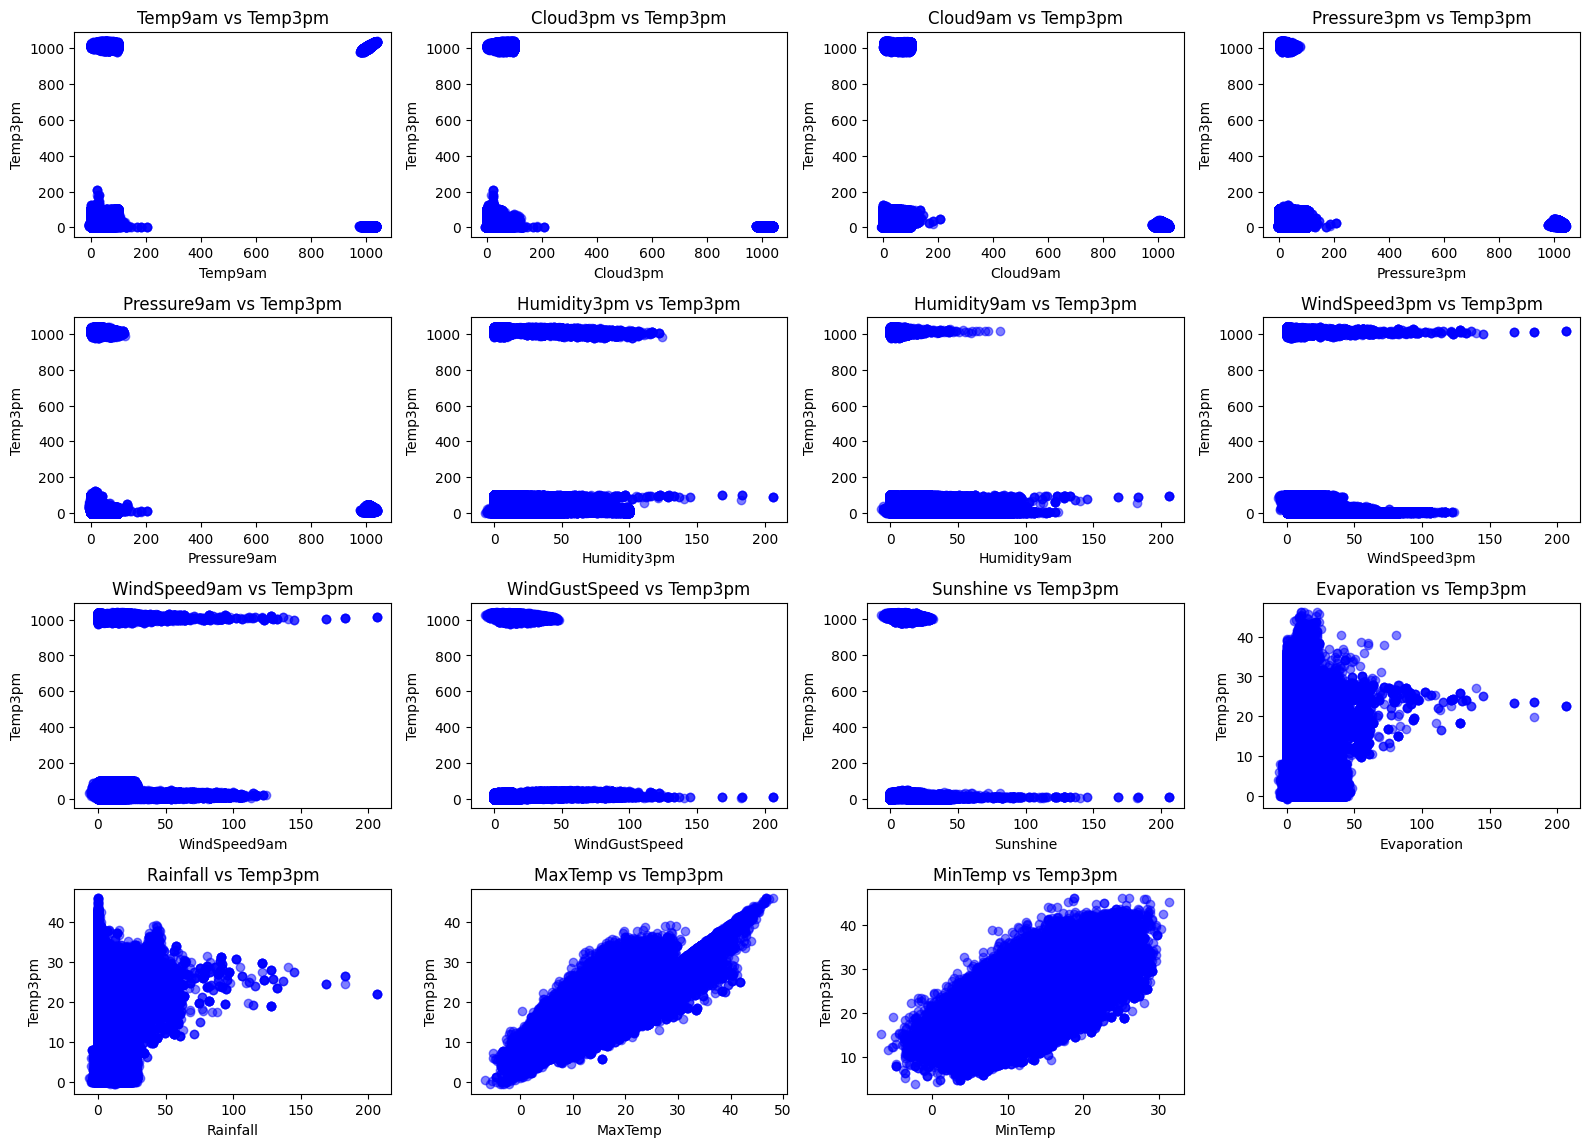

In [75]:
numerical_features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                       'Temp9am', 'Temp3pm']

# Plotting scatter plots for relationships between numerical features
plt.figure(figsize=(16, 14))
for i in range(len(numerical_features)):
    for j in range(i + 1, len(numerical_features)):
        plt.subplot(5, 4, j - i)
        plt.scatter(x[numerical_features[i]], x[numerical_features[j]], alpha=0.5, color='b')
        plt.title(f'{numerical_features[i]} vs {numerical_features[j]}')
        plt.xlabel(numerical_features[i])
        plt.ylabel(numerical_features[j])

plt.tight_layout()
plt.show()

##Plotting box plots for numerical features

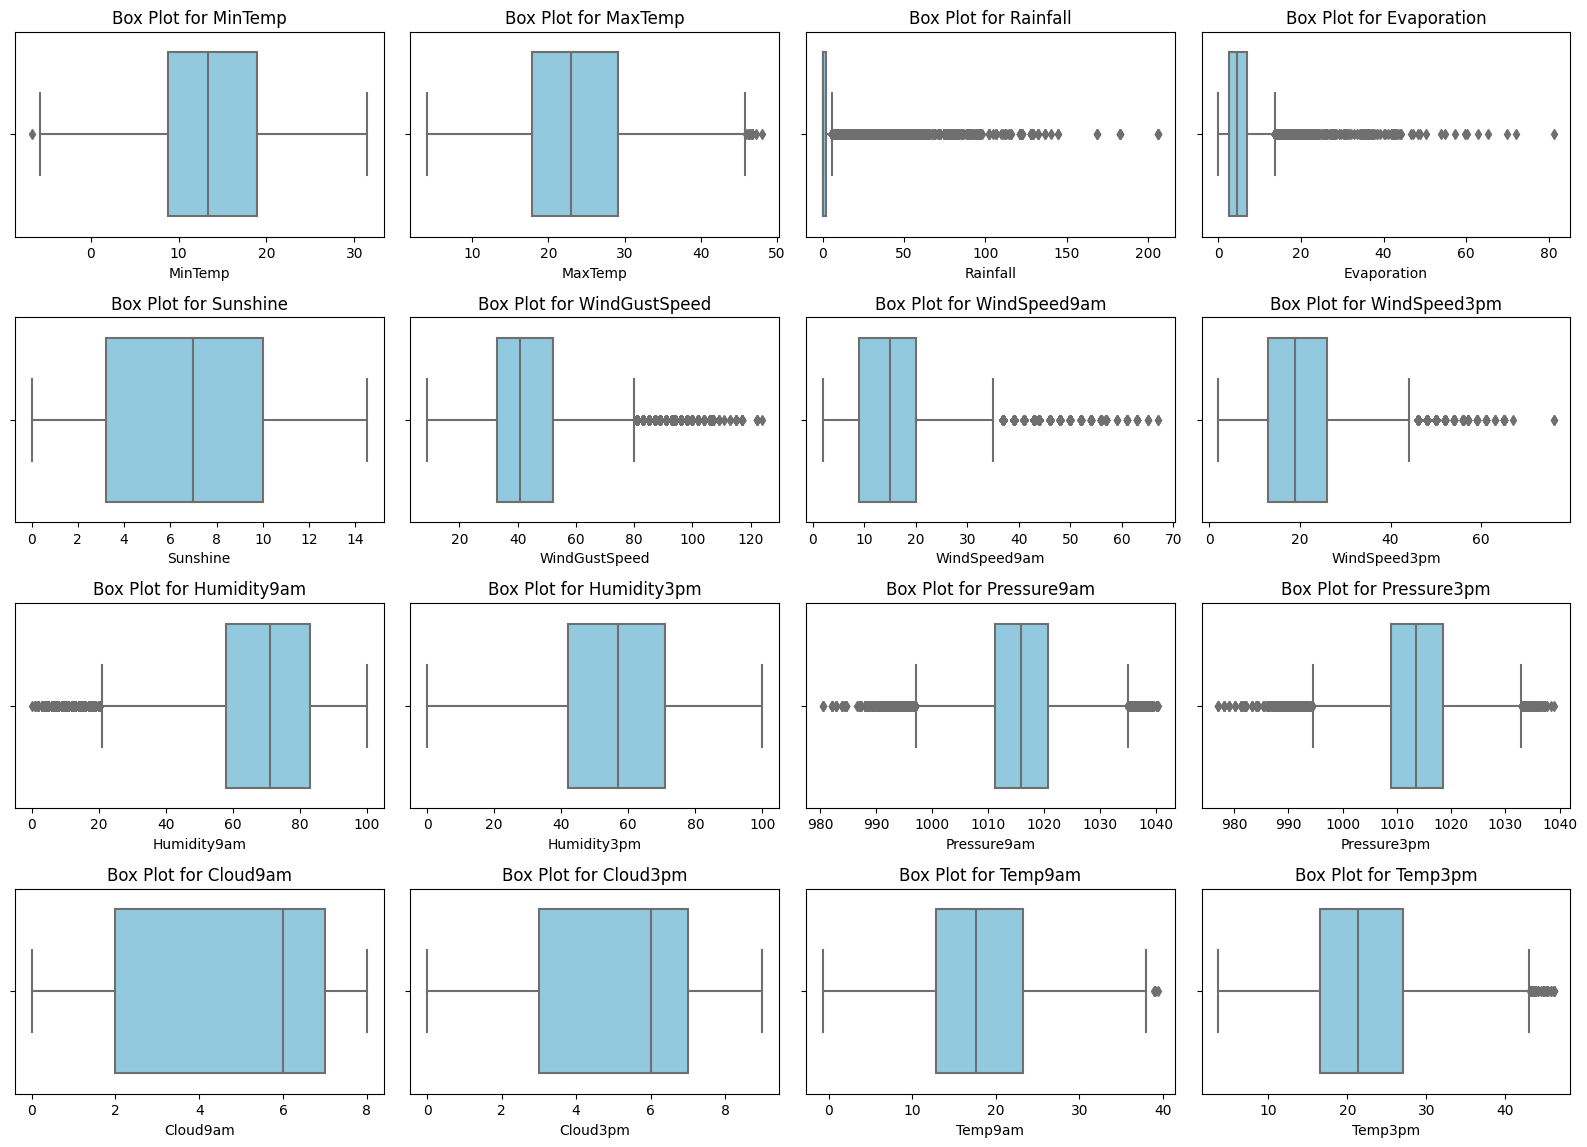

In [76]:
numerical_features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                       'Temp9am', 'Temp3pm']

# Plotting box plots for numerical features
plt.figure(figsize=(16, 14))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(5, 4, i)
    sns.boxplot(x=x[feature], color='skyblue')
    plt.title(f'Box Plot for {feature}')

plt.tight_layout()
plt.show()

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.20, random_state=0)

This code is performing a train-test split on the data, where x represents the feature matrix and y represents the target variable.

The train_test_split function from the sklearn.model_selection module is used to randomly split the dataset into two parts - a training set and a testing set. The test_size parameter is set to 0.20, which means that 20% of the data will be used for testing and the remaining 80% will be used for training the model.

The random_state parameter is set to 0, which ensures that the same split is obtained every time the code is run, allowing for reproducibility. The function returns four arrays: X_train, which contains the training features, X_test, which contains the testing features, Y_train, which contains the training target variable, and Y_test, which contains the testing target variable.

In [80]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(70388, 91)
(17598, 91)
(70388,)
(17598,)


In [81]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

This code is performing feature scaling using standardization on the training and testing sets. Standardization is a common preprocessing technique used in machine learning to transform the data to have a mean of 0 and standard deviation of 1. The StandardScaler() function from sklearn.preprocessing is used to perform this transformation.

The fit_transform() method of the sc object is called on X_train to fit the scaler on the training data and transform it. The transform() method is called on X_test to transform the testing data using the same scaler that was fit on the training data. This ensures that the same scaling is applied to both the training and testing data, preventing data leakage and ensuring that the model is trained and evaluated on data that has been processed in the same way.

In [82]:
X_train

array([[ 1.57748412,  1.05591309, -0.1698965 , ..., -0.28529807,
        -0.26239145, -0.27019282],
       [ 0.41431778, -0.78659654, -0.27958919, ..., -0.28529807,
        -0.26239145, -0.27019282],
       [-1.04351737, -0.87229466, -0.01632674, ..., -0.28529807,
        -0.26239145, -0.27019282],
       ...,
       [ 1.98071512,  2.42708305, -0.36734334, ..., -0.28529807,
        -0.26239145,  3.70106056],
       [-0.68681303,  0.58457342, -0.36734334, ..., -0.28529807,
        -0.26239145,  3.70106056],
       [-1.24513287, -1.41504944, -0.32346626, ..., -0.28529807,
         3.8110998 , -0.27019282]])

In [83]:
missing_values = df.isnull().sum()

print(missing_values)

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64


##(1)Logistic Regression

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

# create a Logistic Regression model
lr = LogisticRegression(random_state=0)

# fit the model on the training data
lr.fit(X_train, Y_train)

# predict the class labels for the test set
Y_pred = lr.predict(X_test)

# print the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)


# calculate accuracy, TP, TN, FP, FN
accuracy = accuracy_score(Y_test, Y_pred)
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# print the results
print("Accuracy:", accuracy)
print("Accuracy in percentage: {:.2f}%".format(accuracy * 100))
print("Confusion Matrix:\n", cm)
print("True Positives(TP) = {}".format(TP))
print("True Negatives(TN) = {}".format(TN))
print("False Positives(FP) = {}".format(FP))
print("False Negatives(FN) = {}".format(FN))
print("classification report:\n", classification_report(Y_test, Y_pred))

Accuracy: 0.8089555631321741
Accuracy in percentage: 80.90%
Confusion Matrix:
 [[7176 1620]
 [1742 7060]]
True Positives(TP) = 7060
True Negatives(TN) = 7176
False Positives(FP) = 1620
False Negatives(FN) = 1742
classification report:
               precision    recall  f1-score   support

           0       0.80      0.82      0.81      8796
           1       0.81      0.80      0.81      8802

    accuracy                           0.81     17598
   macro avg       0.81      0.81      0.81     17598
weighted avg       0.81      0.81      0.81     17598



This code is training a Logistic Regression model on the training data and predicting the class labels for the test set. It then calculates the confusion matrix, accuracy, true positives, true negatives, false positives, and false negatives for the model's predictions. It then prints these values along with a classification report, which includes precision, recall, and F1-score for each class as well as the overall accuracy, macro average, and weighted average.

##(2)KNN

##K = 3


In [85]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Create an instance of the classifier with n_neighbors=3
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model to the training data
knn.fit(X_train, Y_train)

# Predict the test data
Y_pred = knn.predict(X_test)

# Evaluate the model on the test data
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, Y_pred)
# print("Accuracy:", accuracy)
# print("Accuracy: {:.2f}%".format(accuracy * 100))


# print the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
# print("Confusion Matrix:\n", cm)



# calculate accuracy, TP, TN, FP, FN
accuracy = accuracy_score(Y_test, Y_pred)
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# print the results
print("Accuracy:", accuracy)
print("Accuracy in percentage: {:.2f}%".format(accuracy * 100))
print("Confusion Matrix:\n", cm)
print("True Positives(TP) = {}".format(TP))
print("True Negatives(TN) = {}".format(TN))
print("False Positives(FP) = {}".format(FP))
print("False Negatives(FN) = {}".format(FN))
print("classification report:\n", classification_report(Y_test, Y_pred))

Accuracy: 0.8446414365268781
Accuracy in percentage: 84.46%
Confusion Matrix:
 [[6867 1929]
 [ 805 7997]]
True Positives(TP) = 7997
True Negatives(TN) = 6867
False Positives(FP) = 1929
False Negatives(FN) = 805
classification report:
               precision    recall  f1-score   support

           0       0.90      0.78      0.83      8796
           1       0.81      0.91      0.85      8802

    accuracy                           0.84     17598
   macro avg       0.85      0.84      0.84     17598
weighted avg       0.85      0.84      0.84     17598



##K = 5

In [86]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Create an instance of the classifier with n_neighbors=5
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model to the training data
knn.fit(X_train, Y_train)

# Predict the test data
Y_pred = knn.predict(X_test)

# Evaluate the model on the test data
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, Y_pred)
# print("Accuracy:", accuracy)
# print("Accuracy: {:.2f}%".format(accuracy * 100))


# print the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
# print("Confusion Matrix:\n", cm)



# calculate accuracy, TP, TN, FP, FN
accuracy = accuracy_score(Y_test, Y_pred)
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# print the results
print("Accuracy:", accuracy)
print("Accuracy in percentage: {:.2f}%".format(accuracy * 100))
print("Confusion Matrix:\n", cm)
print("True Positives(TP) = {}".format(TP))

print("True Negatives(TN) = {}".format(TN))
print("False Positives(FP) = {}".format(FP))
print("False Negatives(FN) = {}".format(FN))
print("classification report:\n", classification_report(Y_test, Y_pred))

Accuracy: 0.8063984543698147
Accuracy in percentage: 80.64%
Confusion Matrix:
 [[6646 2150]
 [1257 7545]]
True Positives(TP) = 7545
True Negatives(TN) = 6646
False Positives(FP) = 2150
False Negatives(FN) = 1257
classification report:
               precision    recall  f1-score   support

           0       0.84      0.76      0.80      8796
           1       0.78      0.86      0.82      8802

    accuracy                           0.81     17598
   macro avg       0.81      0.81      0.81     17598
weighted avg       0.81      0.81      0.81     17598



##K = 10

In [87]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Create an instance of the classifier with n_neighbors=10
knn = KNeighborsClassifier(n_neighbors=10)

# Fit the model to the training data
knn.fit(X_train, Y_train)

# Predict the test data
Y_pred = knn.predict(X_test)

# Evaluate the model on the test data
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, Y_pred)
# print("Accuracy:", accuracy)
# print("Accuracy: {:.2f}%".format(accuracy * 100))


# print the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
# print("Confusion Matrix:\n", cm)



# calculate accuracy, TP, TN, FP, FN
accuracy = accuracy_score(Y_test, Y_pred)
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# print the results
print("Accuracy:", accuracy)
print("Accuracy in percentage: {:.2f}%".format(accuracy * 100))
print("Confusion Matrix:\n", cm)
print("True Positives(TP) = {}".format(TP))
print("True Negatives(TN) = {}".format(TN))
print("False Positives(FP) = {}".format(FP))
print("False Negatives(FN) = {}".format(FN))
print("classification report:\n", classification_report(Y_test, Y_pred))

Accuracy: 0.7824184566428003
Accuracy in percentage: 78.24%
Confusion Matrix:
 [[7084 1712]
 [2117 6685]]
True Positives(TP) = 6685
True Negatives(TN) = 7084
False Positives(FP) = 1712
False Negatives(FN) = 2117
classification report:
               precision    recall  f1-score   support

           0       0.77      0.81      0.79      8796
           1       0.80      0.76      0.78      8802

    accuracy                           0.78     17598
   macro avg       0.78      0.78      0.78     17598
weighted avg       0.78      0.78      0.78     17598



This code trains a K-nearest neighbor (KNN) classifier on some training data X_train and Y_train. The trained model is then used to predict the labels of some test data X_test, and the accuracy of the model is evaluated using the accuracy_score function from the sklearn.metrics module.

The confusion matrix is printed using the confusion_matrix function from the sklearn.metrics module, and then the true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN) are calculated. These metrics give a more detailed understanding of how well the classifier is performing.

Finally, the classification_report function from the sklearn.metrics module is used to print a report of precision, recall, and f1-score for each class, as well as the overall accuracy, precision, recall, and f1-score of the classifier.

##(3)Naive Bayes

In [88]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# create Gaussian Naive Bayes model object
nb = GaussianNB()

# train the model using training set
nb.fit(X_train, Y_train)

# predict using the trained model
Y_pred = nb.predict(X_test)

# evaluate the performance of the model
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(Y_test, Y_pred)
cm = confusion_matrix(Y_test, Y_pred)

# calculate accuracy, TP, TN, FP, FN
accuracy = accuracy_score(Y_test, Y_pred)
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# print the results
print("Accuracy:", accuracy)
print("Accuracy in %: {:.2f}%".format(accuracy * 100))
print("Confusion Matrix:\n", cm)
print("True Positives(TP) = {}".format(TP))
print("True Negatives(TN) = {}".format(TN))
print("False Positives(FP) = {}".format(FP))
print("False Negatives(FN) = {}".format(FN))
print("classification report:\n", classification_report(Y_test, Y_pred))

Accuracy: 0.721502443459484
Accuracy in %: 72.15%
Confusion Matrix:
 [[6041 2755]
 [2146 6656]]
True Positives(TP) = 6656
True Negatives(TN) = 6041
False Positives(FP) = 2755
False Negatives(FN) = 2146
classification report:
               precision    recall  f1-score   support

           0       0.74      0.69      0.71      8796
           1       0.71      0.76      0.73      8802

    accuracy                           0.72     17598
   macro avg       0.72      0.72      0.72     17598
weighted avg       0.72      0.72      0.72     17598



This code trains a Gaussian Naive Bayes classification model on a training set, uses it to predict labels for a test set, and then evaluates its performance using metrics such as accuracy, confusion matrix, and classification report. The Gaussian Naive Bayes algorithm is a probabilistic model that assumes features are independent and that their distribution follows a Gaussian or normal distribution. The model is trained on a set of labeled data and uses Bayes' theorem to calculate the probability of each class given a set of features.

The accuracy of the model is then calculated by comparing the predicted labels to the true labels in the test set. The confusion matrix is a table that shows the number of true positives, true negatives, false positives, and false negatives, which can be used to calculate metrics such as precision, recall, and F1 score. The classification report is a summary of these metrics for each class, as well as the overall accuracy of the model.

##(4)Random Forest

n_estimators: The number of trees in the forest (default=100). In this case, 1000 trees will be used in the forest.

random_state: Controls both the randomness of the bootstrapping of the samples used when building trees and the sampling of the features to consider when looking for the best split at each node. This ensures that the results are reproducible.
max_leaf_nodes: The maximum number of leaf nodes in each


decision tree. This limits the depth of the tree, thereby avoiding overfitting.

min_samples_split: The minimum number of samples required to split an internal node. If a node has fewer samples than this number, it will not be split. This parameter also helps to prevent overfitting by setting a threshold on the minimum number of samples required to split a node.


In [100]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Instantiate the model
rf = RandomForestClassifier(n_estimators=1000, random_state=1,max_leaf_nodes=20, min_samples_split=15)

# Train the model
rf.fit(X_train, Y_train)


# Make predictions on the test set
Y_pred = rf.predict(X_test)
# Evaluate the accuracy of the model
accuracy = accuracy_score(Y_test, Y_pred)



# print the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)



# calculate accuracy, TP, TN, FP, FN
accuracy = accuracy_score(Y_test, Y_pred)
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# print the results
print("Accuracy:", accuracy)
print("Model[0] Testing Accuracy = {:.2f}%".format(accuracy * 100))
print("Confusion Matrix:\n", cm)
print("True Positives(TP) = {}".format(TP))
print("True Negatives(TN) = {}".format(TN))
print("False Positives(FP) = {}".format(FP))
print("False Negatives(FN) = {}".format(FN))
print("classification report:\n", classification_report(Y_test, Y_pred))

Accuracy: 0.7923059438572565
Model[0] Testing Accuracy = 79.23%
Confusion Matrix:
 [[6714 2082]
 [1573 7229]]
True Positives(TP) = 7229
True Negatives(TN) = 6714
False Positives(FP) = 2082
False Negatives(FN) = 1573
classification report:
               precision    recall  f1-score   support

           0       0.81      0.76      0.79      8796
           1       0.78      0.82      0.80      8802

    accuracy                           0.79     17598
   macro avg       0.79      0.79      0.79     17598
weighted avg       0.79      0.79      0.79     17598



This code trains a Random Forest Classifier model on some training data (X_train and Y_train) and evaluates its performance on a test set (X_test and Y_test). The Random Forest Classifier is instantiated with some hyperparameters, such as the number of trees (n_estimators), the maximum number of leaf nodes per tree (max_leaf_nodes), and the minimum number of samples required to split a node (min_samples_split).

After training the model, it makes predictions on the test set and evaluates its performance using the accuracy score and a confusion matrix. The code also calculates the number of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN) to further evaluate the performance of the model. Finally, it prints the results including the accuracy, confusion matrix, and a classification report.

##(5)Decision Tree

In [98]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Create a decision tree classifier object
dt = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, criterion='entropy', min_samples_split=5,splitter='random', random_state=1)

# Fit the model on training data
dt.fit(X_train, Y_train)

# Predict on test data
Y_pred = dt.predict(X_test)

# Calculate accuracy score
acc = accuracy_score(Y_test, Y_pred)

# print the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)


# calculate accuracy, TP, TN, FP, FN
accuracy = accuracy_score(Y_test, Y_pred)
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# print the results
print("Accuracy:", acc)
print("Accuracy in percentage: {:.2f}%".format(acc * 100))
print("Confusion Matrix:\n", cm)
print("True Positives(TP) = {}".format(TP))
print("True Negatives(TN) = {}".format(TN))
print("False Positives(FP) = {}".format(FP))
print("False Negatives(FN) = {}".format(FN))

print("classification report:\n", classification_report(Y_test, Y_pred))


Accuracy: 0.7287759972724174
Accuracy in percentage: 72.88%
Confusion Matrix:
 [[6469 2327]
 [2446 6356]]
True Positives(TP) = 6356
True Negatives(TN) = 6469
False Positives(FP) = 2327
False Negatives(FN) = 2446
classification report:
               precision    recall  f1-score   support

           0       0.73      0.74      0.73      8796
           1       0.73      0.72      0.73      8802

    accuracy                           0.73     17598
   macro avg       0.73      0.73      0.73     17598
weighted avg       0.73      0.73      0.73     17598



This code performs binary classification using a decision tree classifier. It creates a decision tree classifier object with specified hyperparameters, fits the model on training data, predicts on the test data, and calculates the accuracy score of the model.

The confusion matrix is printed along with the number of true positives, true negatives, false positives, and false negatives. The classification report is also printed which includes precision, recall, F1-score, and support for each class.

##(6)Using xgboostClassifier of tree class to use Decision Tree Algorithm

In [99]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Create XGBClassifier object and set hyperparameters
model = xgb.XGBClassifier(max_depth=5, learning_rate=0.01, n_estimators=100, gamma=0,
                        min_child_weight=1, subsample=0.8, colsample_bytree=0.8, reg_alpha=0.005)

# Fit the model on training data
model.fit(X_train, Y_train)

# Make predictions on test data
Y_pred = model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(Y_test, Y_pred)



# print the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)


# calculate accuracy, TP, TN, FP, FN
accuracy = accuracy_score(Y_test, Y_pred)
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# print the results
#print("Accuracy:", accuracy)
print("Accuracy:", accuracy)
print("Accuracy in percentage: {:.2f}%".format(accuracy * 100))
print("Confusion Matrix:\n", cm)
print("True Positives(TP) = {}".format(TP))
print("True Negatives(TN) = {}".format(TN))
print("False Positives(FP) = {}".format(FP))
print("False Negatives(FN) = {}".format(FN))
print("classification report:\n",classification_report(Y_test, Y_pred))

Accuracy: 0.8031026252983293
Accuracy in percentage: 80.31%
Confusion Matrix:
 [[6970 1826]
 [1639 7163]]
True Positives(TP) = 7163
True Negatives(TN) = 6970
False Positives(FP) = 1826
False Negatives(FN) = 1639
classification report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80      8796
           1       0.80      0.81      0.81      8802

    accuracy                           0.80     17598
   macro avg       0.80      0.80      0.80     17598
weighted avg       0.80      0.80      0.80     17598



This code uses the XGBoost library to create a gradient boosting classifier. The hyperparameters of the model are set and the model is fit on the training data. After training, the model makes predictions on the test data, and the accuracy score is calculated using the accuracy_score function from sklearn.metrics.

The confusion matrix is also printed, which shows the number of true positives, true negatives, false positives, and false negatives. Finally, the classification report is printed using the classification_report function from sklearn.metrics, which shows various classification metrics such as precision, recall, and F1-score for each class.